# Bibliotecas Usadas

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Redes neurais

Redes neurais modelam curvas, não só retas. Assim considerando os dados abaixo sobre a eficácia de uma droga experimental chamada arma X em função da sua dose. Os valores estão normalizados entre 0 e 1

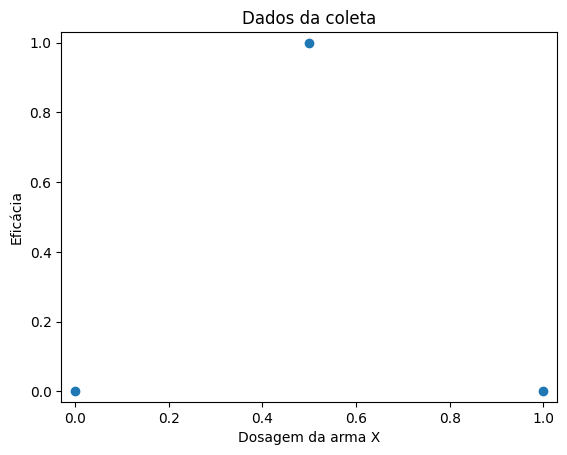

In [27]:
x = np.array([0, 0.5, 1])
y = np.array([0, 1, 0])

plt.scatter(x, y)
plt.xlim(-0.03, 1.03)
plt.ylim(-0.03,1.03)


plt.title("Dados da coleta")
plt.xlabel("Dosagem da arma X")
plt.ylabel("Eficácia")

plt.show()

Para essa rede neural, usaremos um neurônio de entrada, um neurônio de saída e dois neurônios internos. Para cada neurônio interno, os dados são tratados, passam pelos neurônios e depois são tradas mais uma vez e por fim somados

input -> $x_i$\
$x_{i}$ -> $w_{11} \cdot x_{1i} + b_{11}$ -> $ x'_{1i} = neurônio(x_{1i})$ -> $x_{1i}" = w_{12} \cdot x'_{1i}$\
$x_{i}$ -> $w_{21} \cdot x_{2i} + b_{21}$ -> $ x'_{2i} = neurônio(x_{2i})$ -> $x_{2i}" = w_{12} \cdot x'_{2i}$\
$x_i' = x_{2i}" + x_{1i}"$\
output -> $x_i' + b_3$


Convinientemente, já temos a maioria dos parâmetros, exceto o $b_3$.\
Nota: os weights e biases serão escritos em matrizes para os cálculos, dessa forma

Primeiros tratamos os dados com os primeiros weights e biases
$$P = \begin{bmatrix} x_1 \\ x_2 \\ ... \\ x_n \end{bmatrix} \cdot W_1 + B_1$$
$$W1 = \begin{bmatrix} w_{1} & w_{2} & ... & w_{m} \end{bmatrix}$$
Assim a matriz P será uma matriz de tamanho n por m, sendo n o número de dados e m o número de neurônios internos por camada\
Depois usamos a função de ativação em todos os valores de P
$$Q = \alpha(P)$$
multiplicamos pelos últimos weigths
$$R = Q \cdot W_2$$
$$W_2 = \begin{bmatrix} w_{1} \\ w_{2} \\ ... \\ w_{m} \end{bmatrix}$$
Assim R será uma matriz n por 1\
Por último somamos o último bias aos valores e obtemos o previsto pela rede
$$Predict = R + B_f$$

Essa explicação foi geral para m neurônios e uma camada interna, sabendo que existe apenas dois neurônios e queremos apenas otmizar o último bias. podemos classificar os bias em $b_1$, $b_2$ e $b_3$, onde queremos saber otimizar $b_3$

Assim, temos a seguinte formulação

In [586]:
#Inputs e valor esperado esperado
x = np.array([
    [0],
    [0.5],
    [1]
])
esperado = np.array([
    [0],
    [1],
    [0]
])

#Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # Derivada usando a saída pré-calculada da sigmoide
    return x * (1 - x)

#Weights e biases
#Primeiros colocamos os pesos e ajustos paras os parâmetros antes da função de ativação
W1 = np.array([[8.34, -10.43]])
B1 = np.array([-5.43, 4.57])

#Depois, colocamos os pesos dos parâmtros pós função de ativação
W2 = np.array([
    [-2.22],
    [-2.3]
])

#Por fim temos o b3, que como chute inicial colocaremos como 0
b3 = [0]

#Outros dados importantes são o números de passos, que definirá nossa condição de parada e a taxa de aprendizado
learning_rate = 0.1
steps = 1000

In [587]:
def predict(x):
    return (sigmoid((x @ W1) + B1) @ W2) + b3

In [601]:
def plotar():
    x = np.array([0, 0.5, 1])
    y = np.array([0, 1, 0])

    plt.scatter(x, y)
    plt.plot(np.arange(0, 1.01, 0.03), predict(np.arange(0, 1.01, 0.03).reshape(-1, 1))[:,0], color="green")
    plt.xlim(-0.03, 1.03)
    plt.ylim(-2.5,1.03)


    plt.title("Dados da coleta")
    plt.xlabel("Dosagem da arma X")
    plt.ylabel("Eficácia")

    plt.show()


Considerando b3 = 0, temos essa curva

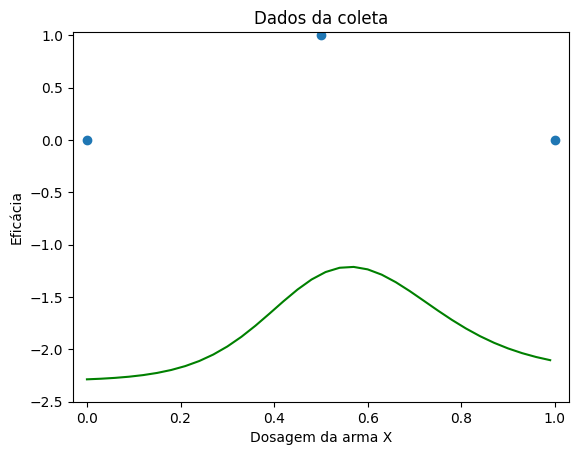

In [602]:
plotar()